## Mount Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries and Dependencies

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patheffects as path_effects
from datetime import datetime

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Ondema/hidmet_gov_rs_BELGRADE_2000_2022.csv')

In [19]:
df.head()

,date,waterlevel
0,2000/01/01,461.0
1,2000/01/02,474.0
2,2000/01/03,478.0
3,2000/01/04,474.0
4,2000/01/05,464.0


In [20]:
df.tail()

,date,waterlevel
8396,2022-12-27,358.0
8397,2022-12-28,356.0
8398,2022-12-29,362.0
8399,2022-12-30,370.0
8400,2022-12-31,374.0


## Functions

In [21]:
def getMonth(date):
  # date = convertStringToDate(date)
  # if (date == False):
  #   return 13
  return date.month

def getYear(date):
  # date = convertStringToDate(date)
  # if (date == False):
  #   return 13
  return date.year

def convertStringToDate(date_string):
  
  try:
    format = "%Y-%m-%d" #specifify the format of the date_string.
    date = datetime.strptime(date_string, format)
  except:
    try:
      format = "%Y/%m/%d" #specifify the format of the date_string.
      date = datetime.strptime(date_string, format)
    except Exception as e:
      print(date_string)
      print("Error")
      return False
  return date

  
def PlotLineChart(x_axis, y_axis, title_name, x_axis_name, y_axis_name):
  plt.plot(x_axis, y_axis)
  plt.xticks(x_axis, rotation=90)
  ##plt.xticks(rotation=45, ha='right')
  plt.title(title_name)
  plt.xlabel(x_axis_name)
  plt.ylabel(y_axis_name)
  plt.show()

In [22]:
df["date"] = df["date"].apply(lambda x: convertStringToDate(x))
df["Month"] = df["date"].apply(lambda x: getMonth(x))
df["Year"] = df["date"].apply(lambda x: getYear(x))

In [23]:
df.describe()

,waterlevel,Month,Year
count,8401.000000,8401.000000,8401.000000
mean,283.631711,6.522795,2010.999286
std,104.576325,3.448945,6.633842
min,12.000000,1.000000,2000.000000
25%,205.000000,4.000000,2005.000000
50%,264.000000,7.000000,2011.000000
75%,345.000000,10.000000,2017.000000
max,738.000000,12.000000,2022.000000


In [26]:
print("missing_data:", df.isna().sum())
print("unique dates:", df.index.nunique())

missing_data: date          0
waterlevel    0
Month         0
Year          0
dtype: int64
unique dates: 8401


In [56]:
duplicateRows = df[df.duplicated(keep = False)]
duplicateRows

,date,waterlevel


#### No Missing and Duplicate Data 8401 row and 8401 unique dates

In [35]:
GroupByMonth = df.groupby(['Month'])['waterlevel'].mean()
GroupByYear = df.groupby(['Year'])['waterlevel'].mean()

In [36]:
GroupByYear = GroupByYear.to_frame()
GroupByMonth = GroupByMonth.to_frame()

In [37]:
GroupByMonth
GroupByYear

,waterlevel
Year,
2000,283.789617
2001,305.967123
2002,312.602740
2003,235.731507
2004,304.352459
2005,336.287671
2006,341.441096
2007,266.865753
2008,198.459016


#### No Missing Data

## EDA

In [38]:
GroupByYear_Year = GroupByYear.index.tolist()
GroupByYear_WaterLevel = GroupByYear["waterlevel"].to_list()

GroupByMonth_Month = GroupByMonth.index.tolist()
GroupByMonth_WaterLevel = GroupByMonth["waterlevel"].to_list()

## Line Chart on the Water Level from 2000 to 2022

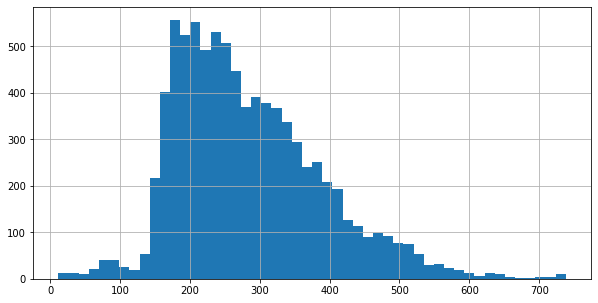

In [52]:
df['waterlevel'].hist(bins=50, figsize=(10,5))

The water level follows a normal distribution

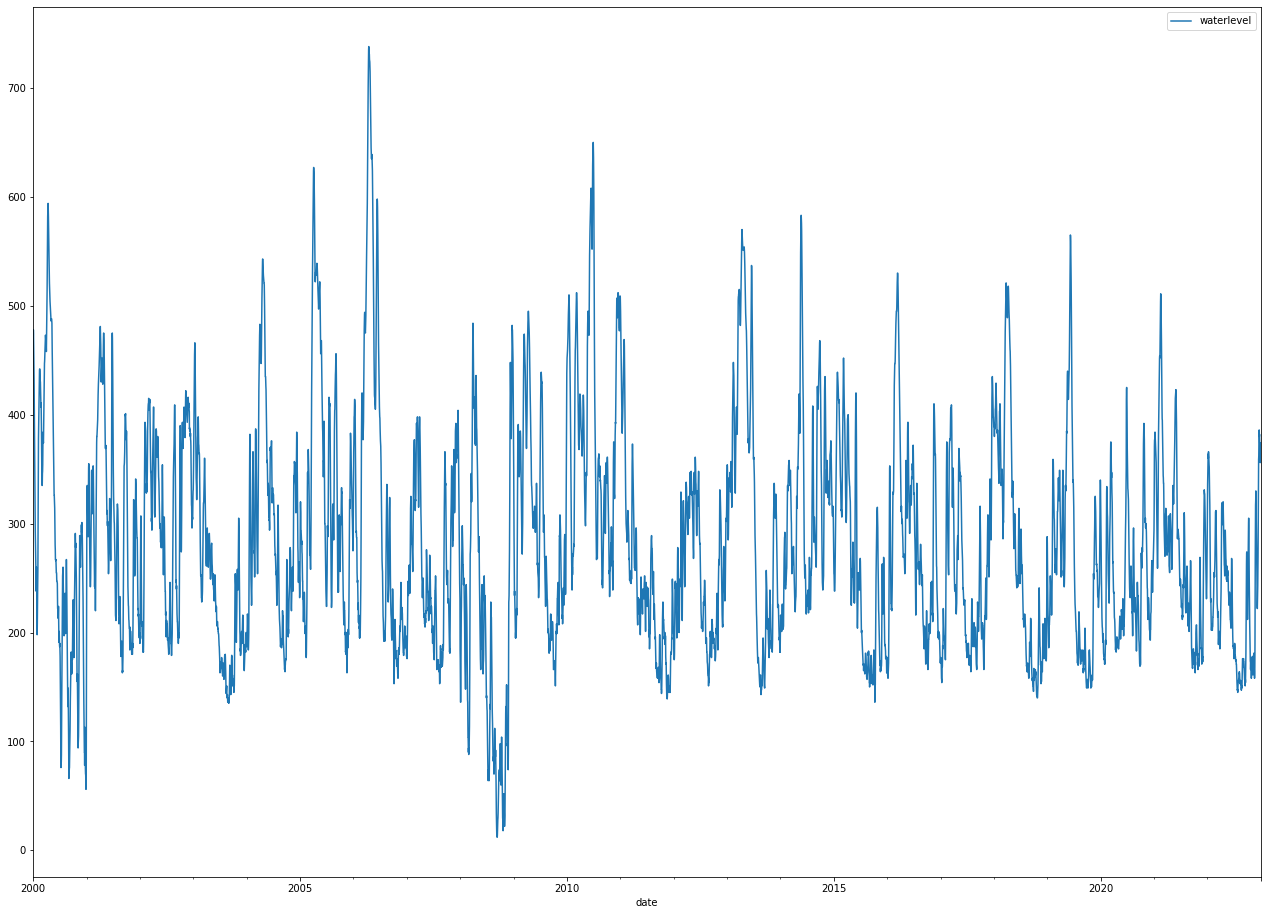

In [36]:
df.plot( 'date' , 'waterlevel' , figsize = (22, 16))

## Bar Chart and Line Chart on The Average Water Level from 2000 to 2022

In [21]:
GroupByYear

,waterlevel
Year,
2000,283.789617
2001,305.967123
2002,312.602740
2003,235.731507
2004,304.352459
2005,336.287671
2006,341.441096
2007,266.865753
2008,198.459016


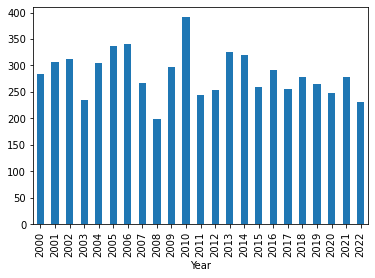

In [17]:
GroupByYear.plot.bar();

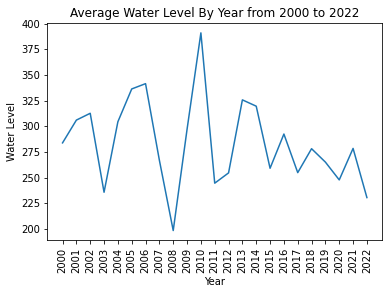

In [23]:
PlotLineChart(GroupByYear_Year, GroupByYear_WaterLevel, "Average Water Level By Year from 2000 to 2022","Year", "Water Level")

## Average Water Level by Months from Year 2000 to 2020

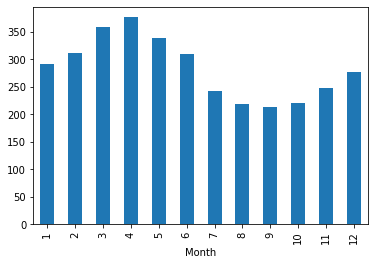

In [16]:
GroupByMonth.plot.bar()

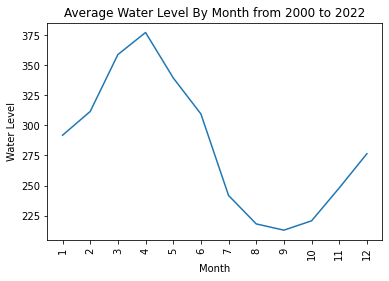

In [24]:
PlotLineChart(GroupByMonth_Month, GroupByMonth_WaterLevel, "Average Water Level By Month from 2000 to 2022","Month", "Water Level")

From the plots above, we can observe that average water level were increasing from January until April. The water start to drop dratiscally after April till September before the Water Level. The water level back to increase after September.

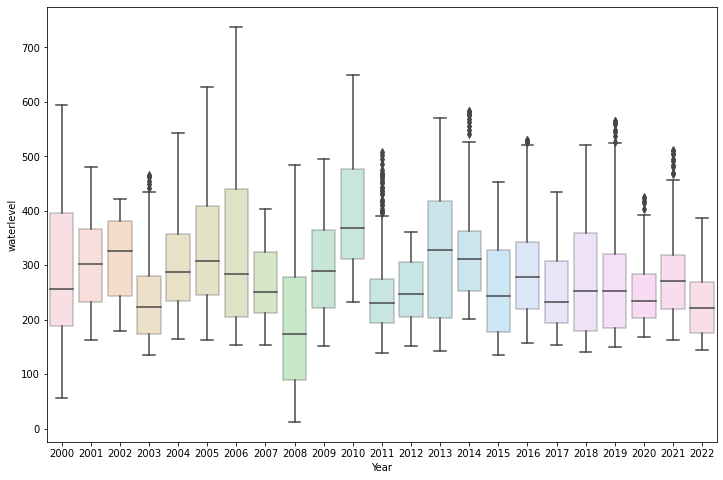

In [27]:
#box plot to see distribution of water level in each year
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df, x=df.Year, y = df.waterlevel,  ax = ax, boxprops=dict(alpha=.3));
##sns.swarmplot(data=df, x=df.Year, y = df.waterlevel);

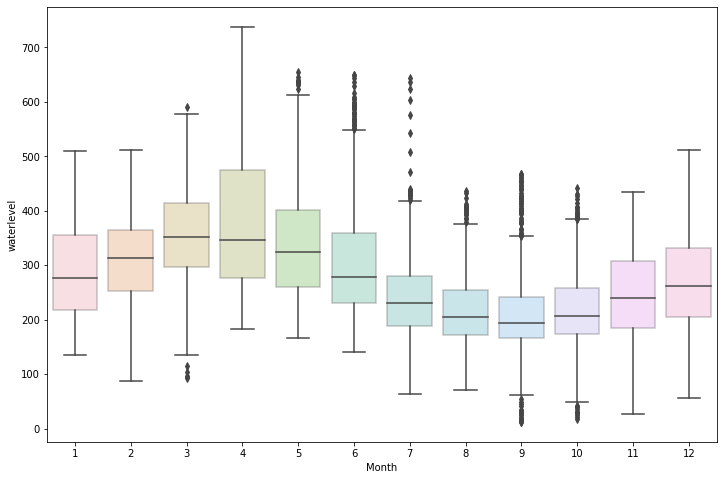

In [28]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df, x=df.Month, y = df.waterlevel,  ax = ax, boxprops=dict(alpha=.3));

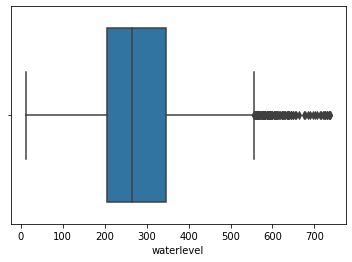

In [54]:
sns.boxplot(x=df['waterlevel'])